In [37]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('..')

## Оформление пользовательских функций

In [38]:
def print_res(target, fact, rnd, title):
    target = np.round(target,rnd)
    fact = np.round(fact,rnd)
    res = np.round(target - fact,rnd)
    res_percent = np.round(100*(target - fact)/target, 0)
    print('\n',title,':')
    print(f'target: {target}')
    print(f'fact: {fact}')
    print(f'res: {res}')
    print(f'res %: {res_percent}')

In [42]:
import matplotlib.image as mpimg

def plot_metrics(DIR, title=''):
    # Создаем фигуру с тремя подграфиками в одну строку
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Добавляем общий заголовок для всей фигуры
    fig.suptitle(title, fontsize=16)
    
    # Первый график - convergence_cov
    img1 = mpimg.imread(DIR + 'convergence_cov_inTime.png')
    axes[0].imshow(img1)
    axes[0].axis('off')
    axes[0].set_title('Convergence Covariance')
    
    # Второй график - convergence_mean
    img2 = mpimg.imread(DIR + 'convergence_mean_inTime.png')
    axes[1].imshow(img2)
    axes[1].axis('off')
    axes[1].set_title('Convergence Mean')
    
    # Третий график - convergence_var
    img3 = mpimg.imread(DIR + 'convergence_var_inTime.png')
    axes[2].imshow(img3)
    axes[2].axis('off')
    axes[2].set_title('Convergence Variance')
    
    # Автоматическая подгонка расположения
    plt.tight_layout()
    plt.show()

In [43]:
def get_results(experiments_dir_name):
    RESULT_DIR = '../results/' + experiments_dir_name + '/'
    RESULT_DIR_MOD = '../results/' + experiments_dir_name + '_MOD' + '/'

    print(RESULT_DIR)
    print(RESULT_DIR_MOD)
    
    df_time = pd.read_csv(RESULT_DIR + 'df_time.csv')['0']
    df_time_MOD = pd.read_csv(RESULT_DIR_MOD + 'df_time.csv')['0']
    
    df_result = pd.read_csv(RESULT_DIR + 'df_result.csv')
    df_result_MOD = pd.read_csv(RESULT_DIR_MOD + 'df_result.csv')

    return RESULT_DIR, RESULT_DIR_MOD,  df_time, df_time_MOD, df_result, df_result_MOD

## Эксперимент "gaussian_dim-5__mean-0.1_var_1"

In [44]:
experiments_dir_name = 'gaussian_dim-5__mean-0.1_var_1'
RESULT_DIR, RESULT_DIR_MOD,  df_time, df_time_MOD, df_result, df_result_MOD = get_results(experiments_dir_name)

../results/gaussian_dim-5__mean-0.1_var_1/
../results/gaussian_dim-5__mean-0.1_var_1_MOD/


In [45]:
data = torch.load(RESULT_DIR + 'data.pt')
x0_test = data['x0_test']

In [46]:
print('Данные для BASE алгоритма \n')
print(f'Среднее время выполнения эпохи: {np.round(df_time.mean(),0).item()} сек.')
print(f'Суммарное время обучения: {np.round(df_time.sum(),0).item()} сек. или {np.round(df_time.sum()/60,0).item()}  мин.')

print_res(x0_test.mean(0).mean(0).item(), df_result['mean'].iloc[-1], 4, 'mean')
print_res(x0_test.var(0).mean(0).item(), df_result['var'].iloc[-1], 4, 'var')
print_res((np.sqrt(5) - 1) / 2, df_result['cov'].iloc[-1], 4, 'cov')

Данные для BASE алгоритма 

Среднее время выполнения эпохи: 71.0 сек.
Суммарное время обучения: 709.0 сек. или 12.0  мин.

 mean :
target: -0.1025
fact: -0.104
res: 0.0015
res %: -1.0

 var :
target: 1.0076
fact: 1.0434
res: -0.0358
res %: -4.0

 cov :
target: 0.618
fact: 0.6274
res: -0.0094
res %: -2.0


In [47]:
print('Данные для MOD алгоритма \n')
print(f'Среднее время выполнения эпохи: {np.round(df_time_MOD.mean(),0).item()} сек.')
print(f'Суммарное время обучения: {np.round(df_time_MOD.sum(),0).item()} сек. или {np.round(df_time_MOD.sum()/60,0).item()}  мин.')

print_res(x0_test.mean(0).mean(0).item(), df_result_MOD['mean'].iloc[-1], 4, 'mean')
print_res(x0_test.var(0).mean(0).item(), df_result_MOD['var'].iloc[-1], 4, 'var')
print_res((np.sqrt(5) - 1) / 2, df_result_MOD['cov'].iloc[-1], 4, 'cov')

Данные для MOD алгоритма 

Среднее время выполнения эпохи: 1.0 сек.
Суммарное время обучения: 93.0 сек. или 2.0  мин.

 mean :
target: -0.1025
fact: -0.107
res: 0.0045
res %: -4.0

 var :
target: 1.0076
fact: 1.0299
res: -0.0223
res %: -2.0

 cov :
target: 0.618
fact: 0.61
res: 0.008
res %: 1.0


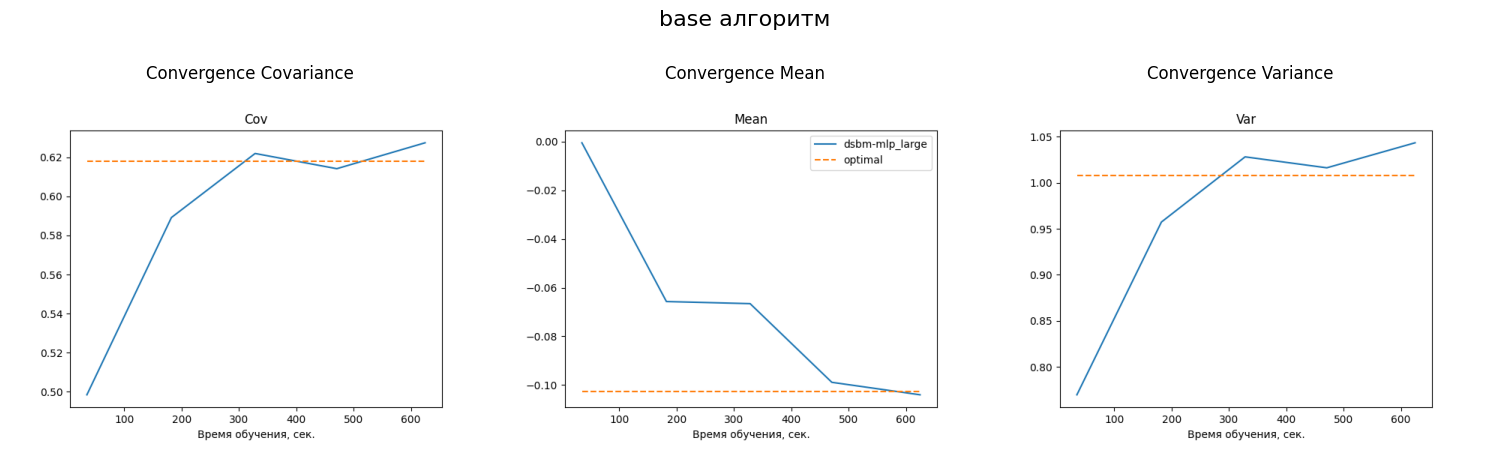

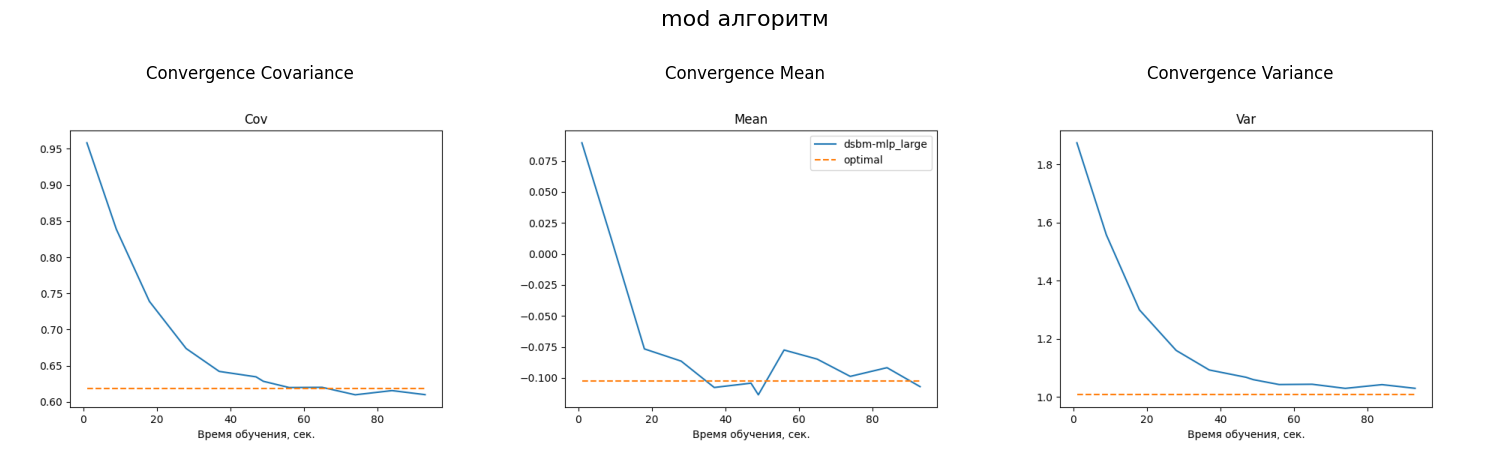

In [48]:
plot_metrics(RESULT_DIR, 'base алгоритм')
plot_metrics(RESULT_DIR_MOD, 'mod алгоритм')

## Эксперимент "gaussian_dim-5_mean-10_var-1"

In [50]:
experiments_dir_name = 'gaussian_dim-5__mean-10_var_1'
RESULT_DIR, RESULT_DIR_MOD,  df_time, df_time_MOD, df_result, df_result_MOD = get_results(experiments_dir_name)

../results/gaussian_dim-5__mean-10_var_1/
../results/gaussian_dim-5__mean-10_var_1_MOD/


In [51]:
data = torch.load(RESULT_DIR + 'data.pt')
x0_test = data['x0_test']

In [52]:
print(f'Среднее время выполнения эпохи: {np.round(df_time.mean(),0).item()} сек.')
print(f'Суммарное время обучения: {np.round(df_time.sum(),0).item()} сек. или {np.round(df_time.sum()/60,0).item()}  мин.')

print_res(x0_test.mean(0).mean(0).item(), df_result['mean'].iloc[-1], 4, 'mean')
print_res(x0_test.var(0).mean(0).item(), df_result['var'].iloc[-1], 4, 'var')
print_res((np.sqrt(5) - 1) / 2, df_result['cov'].iloc[-1], 4, 'cov')

Среднее время выполнения эпохи: 71.0 сек.
Суммарное время обучения: 1000.0 сек. или 17.0  мин.

 mean :
target: -10.0025
fact: -9.5515
res: -0.451
res %: 5.0

 var :
target: 1.0076
fact: 1.1221
res: -0.1145
res %: -11.0

 cov :
target: 0.618
fact: 0.6589
res: -0.0409
res %: -7.0


In [53]:
print(f'Среднее время выполнения эпохи: {np.round(df_time_MOD.mean(),0).item()} сек.')
print(f'Суммарное время обучения: {np.round(df_time_MOD.sum(),0).item()} сек. или {np.round(df_time_MOD.sum()/60,0).item()}  мин.')

print_res(x0_test.mean(0).mean(0).item(), df_result_MOD['mean'].iloc[-1], 4, 'mean')
print_res(x0_test.var(0).mean(0).item(), df_result_MOD['var'].iloc[-1], 4, 'var')
print_res((np.sqrt(5) - 1) / 2, df_result_MOD['cov'].iloc[-1], 4, 'cov')

Среднее время выполнения эпохи: 1.0 сек.
Суммарное время обучения: 139.0 сек. или 2.0  мин.

 mean :
target: -10.0025
fact: -10.0441
res: 0.0416
res %: -0.0

 var :
target: 1.0076
fact: 1.0303
res: -0.0227
res %: -2.0

 cov :
target: 0.618
fact: 0.6138
res: 0.0042
res %: 1.0


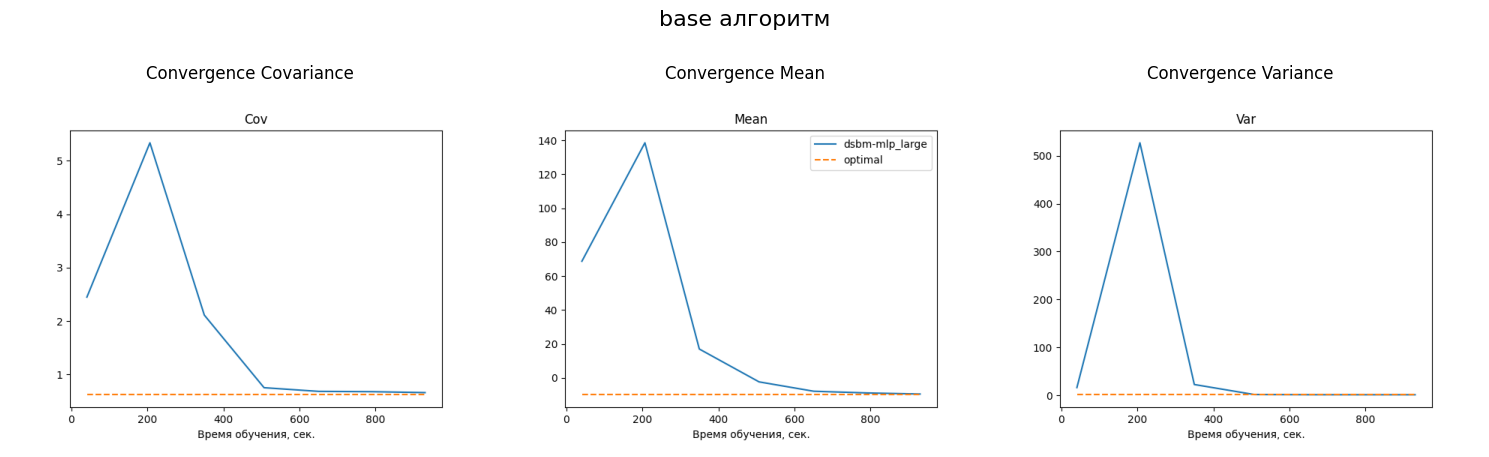

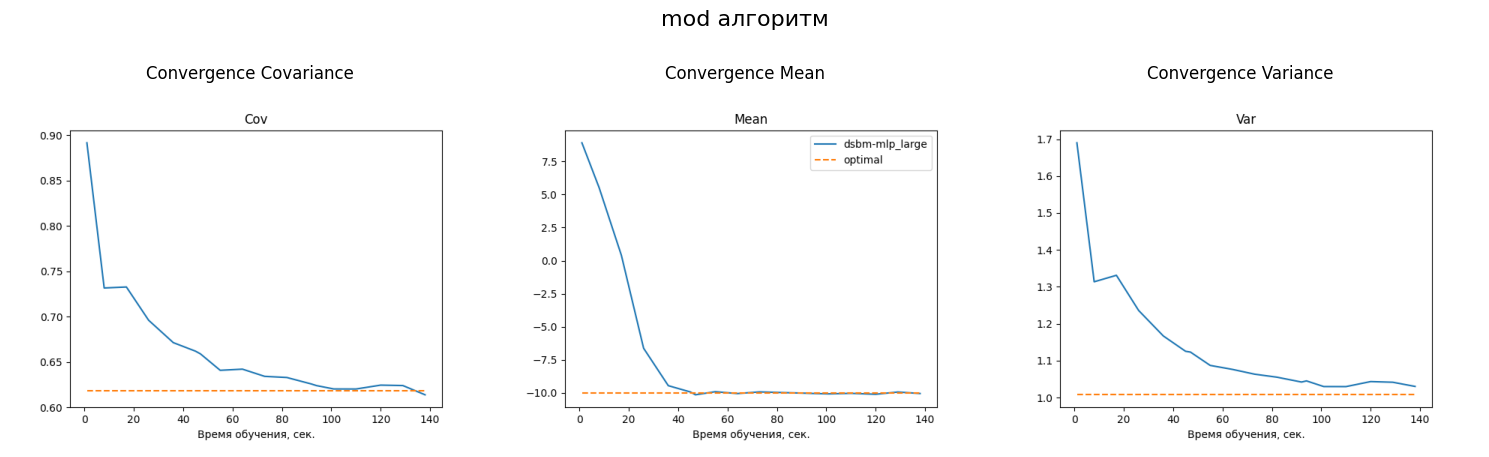

In [54]:
plot_metrics(RESULT_DIR, 'base алгоритм')
plot_metrics(RESULT_DIR_MOD, 'mod алгоритм')